In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import sys
import torchvision.transforms as transforms
import torch.nn.functional as F

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')

In [4]:
from baselines.models.C3D.C3D_model import *

In [6]:
img = Image.open('../dataset/face_landmark/all_imgs_canny/all_edges_img/S001-100/img_r00013.jpg')

In [7]:
def make_power_2(n, base=32.0):    
    return int(round(n / base) * base)

In [8]:
w = img.size[0]
h = img.size[1]
new_w = 256
new_h = 256 * h // w
print(new_w, new_h)

256 408


In [9]:
new_w = int(round(new_w / 4)) * 4
new_h = int(round(new_h / 4)) * 4 
print(new_w, new_h)

256 408


In [10]:
new_w, new_h = make_power_2(new_w), make_power_2(new_h)
print(new_w, new_h)

256 416


In [11]:
new_w = 256
new_h = 384
img = img.resize((new_w, new_h))

In [12]:
new_w

256

In [13]:
new_h

384

In [14]:
input_tensor = torch.Tensor(np.array(img))
input_tensor = input_tensor / 255
input_tensor = input_tensor.unsqueeze(0).unsqueeze(0).unsqueeze(0)

In [50]:
input_tensor.shape

torch.Size([1, 1, 1, 384, 256])

In [67]:
true_tensor = torch.Tensor([])
for num, i in enumerate(range(14, 20, 1)):
    img = Image.open('../dataset/face_landmark/all_imgs_canny/all_edges_img/S001-100/img_r000{}.jpg'.format(i))
    img = img.resize((new_w, new_h))
    read_tensor = torch.Tensor(np.array(img))
    read_tensor = read_tensor / 255
    read_tensor = read_tensor.unsqueeze(0).unsqueeze(0).unsqueeze(0)
    true_tensor = torch.cat((true_tensor, read_tensor), dim=2)

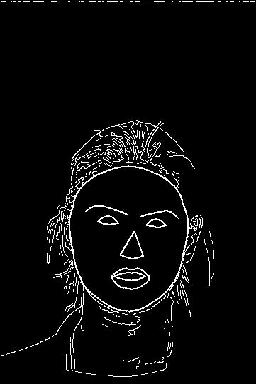

In [68]:
Image.fromarray((true_tensor[0,0,0]*255).numpy().astype('uint8'), 'L')

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = C3DVidPredNet()
model.to(device)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [71]:
model = model.train()
input_tensor = input_tensor.to(device)
true_tensor = true_tensor.to(device)
with torch.set_grad_enabled(True):
    for i in range(2000):
        model.zero_grad()
        output_tensor = model(input_tensor)
        loss = loss_function(output_tensor, true_tensor)
        
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print('iter {}/1000: loss {}'.format(i, loss))

iter 0/1000: loss 0.0369274839758873
iter 10/1000: loss 0.034365132451057434
iter 20/1000: loss 0.03418787568807602
iter 30/1000: loss 0.03409649431705475
iter 40/1000: loss 0.03443820774555206
iter 50/1000: loss 0.03408726304769516
iter 60/1000: loss 0.04437167942523956
iter 70/1000: loss 0.034478042274713516
iter 80/1000: loss 0.033508870750665665
iter 90/1000: loss 0.03312396630644798
iter 100/1000: loss 0.03137236088514328
iter 110/1000: loss 0.029513902962207794
iter 120/1000: loss 0.02759217843413353
iter 130/1000: loss 0.024391185492277145
iter 140/1000: loss 0.018515460193157196
iter 150/1000: loss 0.013468863442540169
iter 160/1000: loss 0.00845487043261528
iter 170/1000: loss 0.005656691268086433
iter 180/1000: loss 0.004901864565908909
iter 190/1000: loss 0.003197684185579419
iter 200/1000: loss 0.002529080957174301
iter 210/1000: loss 0.0022214821074157953
iter 220/1000: loss 0.0020303884521126747
iter 230/1000: loss 0.0018542506732046604
iter 240/1000: loss 0.0015135905705

iter 1950/1000: loss 0.00046821782598271966
iter 1960/1000: loss 0.00044187845196574926
iter 1970/1000: loss 0.0004472968867048621
iter 1980/1000: loss 0.0004445877857506275
iter 1990/1000: loss 0.0004726424813270569


In [40]:
img.size

(256, 384)

In [39]:
np.array(img).shape

(384, 256)

In [41]:
np.array(img)

array([[0, 0, 6, ..., 0, 9, 0],
       [0, 0, 0, ..., 3, 1, 0],
       [0, 0, 8, ..., 3, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

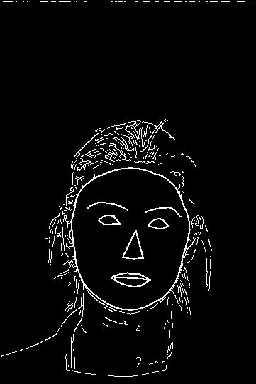

In [42]:
Image.fromarray(np.array(img), 'L')

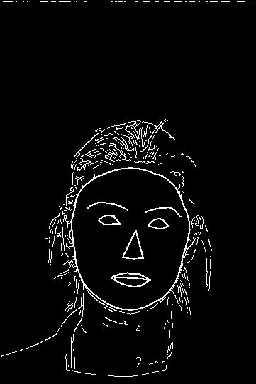

In [48]:
Image.fromarray((input_tensor.squeeze(0).squeeze(0).squeeze(0)*255).numpy().astype('uint8'), 'L')

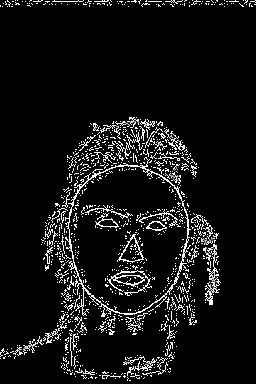

In [84]:
Image.fromarray((output_tensor[0,0,5]*255).detach().cpu().numpy().astype('uint8'), 'L')

In [19]:
model(torch.randn(1, 1, 1, 256, 384))

original size: torch.Size([1, 1, 1, 256, 384])
1 encode size: torch.Size([1, 64, 1, 128, 192])
2 encode size: torch.Size([1, 128, 1, 64, 96])
3 encode size: torch.Size([1, 256, 1, 32, 48])
4 encode size: torch.Size([1, 512, 1, 16, 24])
5 encode size: torch.Size([1, 512, 1, 8, 12])
final size: torch.Size([1, 512, 1, 4, 6])
5 decode size: torch.Size([1, 512, 1, 8, 12])
4 decode size: torch.Size([1, 512, 2, 16, 24])
3 decode size: torch.Size([1, 256, 3, 32, 48])
2 decode size: torch.Size([1, 128, 4, 64, 96])
1 decode size: torch.Size([1, 64, 5, 128, 192])
ori decode size: torch.Size([1, 1, 6, 256, 384])


tensor([[[[[0.0197, 0.0203, 0.0197,  ..., 0.0204, 0.0197, 0.0199],
           [0.0197, 0.0214, 0.0201,  ..., 0.0215, 0.0201, 0.0216],
           [0.0207, 0.0200, 0.0201,  ..., 0.0200, 0.0202, 0.0195],
           ...,
           [0.0197, 0.0215, 0.0200,  ..., 0.0215, 0.0201, 0.0217],
           [0.0208, 0.0200, 0.0201,  ..., 0.0199, 0.0203, 0.0195],
           [0.0200, 0.0214, 0.0206,  ..., 0.0214, 0.0206, 0.0211]],

          [[0.0197, 0.0207, 0.0193,  ..., 0.0209, 0.0193, 0.0200],
           [0.0198, 0.0235, 0.0209,  ..., 0.0237, 0.0209, 0.0212],
           [0.0204, 0.0201, 0.0200,  ..., 0.0201, 0.0203, 0.0197],
           ...,
           [0.0199, 0.0236, 0.0209,  ..., 0.0237, 0.0209, 0.0212],
           [0.0204, 0.0201, 0.0202,  ..., 0.0200, 0.0201, 0.0196],
           [0.0197, 0.0222, 0.0207,  ..., 0.0222, 0.0208, 0.0208]],

          [[0.0197, 0.0208, 0.0193,  ..., 0.0210, 0.0193, 0.0201],
           [0.0199, 0.0236, 0.0211,  ..., 0.0238, 0.0210, 0.0212],
           [0.0204, 0.0200

In [20]:
input_tensor.shape

torch.Size([1, 1, 1, 256, 384])

In [21]:
UnetGenerator(3, 3, 7)

UnetGenerator(
  (model): UnetSkipConnectionBlock(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): UnetSkipConnectionBlock(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace)
          (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): UnetSkipConnectionBlock(
            (model): Sequential(
              (0): LeakyReLU(negative_slope=0.2, inplace)
              (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
              (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (3): UnetSkipConnectionBlock(
                (model): Sequential(
                  (0): LeakyReLU(negative_slope=0.2, inplace)
                  (1): Conv2d(256, 512, kernel_size=(4

In [22]:
UnetGenerator(3, 3, 7)(torch.randn(1, 3, 416, 416)).shape # 

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 13 and 12 in dimension 2 at /pytorch/aten/src/TH/generic/THTensorMath.cpp:3616

In [ ]:
416 / 32